In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("climate.csv")

In [3]:
df.head()

,Day,Outlook,Temp,Humidity,Wind,Play tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [4]:
pre_x=df[['Outlook','Temp','Humidity','Wind']]
y=df[['Play tennis']]

In [5]:
classes=y['Play tennis'].unique()

In [6]:
classes

array(['No', 'Yes'], dtype=object)

In [7]:
labelEncoder = LabelEncoder()

for col in pre_x.columns:
    df[col]=labelEncoder.fit_transform(df[col])

In [8]:
x=df[['Outlook','Temp','Humidity','Wind']]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf=clf.fit(x_train,y_train)

[Text(0.4444444444444444, 0.9, 'Outlook <= 0.5\ngini = 0.463\nsamples = 100.0%\nvalue = [0.364, 0.636]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 27.3%\nvalue = [0.0, 1.0]\nclass = Yes'),
 Text(0.5555555555555556, 0.7, 'Humidity <= 0.5\ngini = 0.5\nsamples = 72.7%\nvalue = [0.5, 0.5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\ngini = 0.375\nsamples = 36.4%\nvalue = [0.75, 0.25]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'Wind <= 0.5\ngini = 0.5\nsamples = 18.2%\nvalue = [0.5, 0.5]\nclass = No'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 9.1%\nvalue = [1.0, 0.0]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 9.1%\nvalue = [0.0, 1.0]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 18.2%\nvalue = [1.0, 0.0]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'Wind <= 0.5\ngini = 0.375\nsamples = 36.4%\nvalue = [0.25, 0.75]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'Temp <= 1.0\ngini = 0

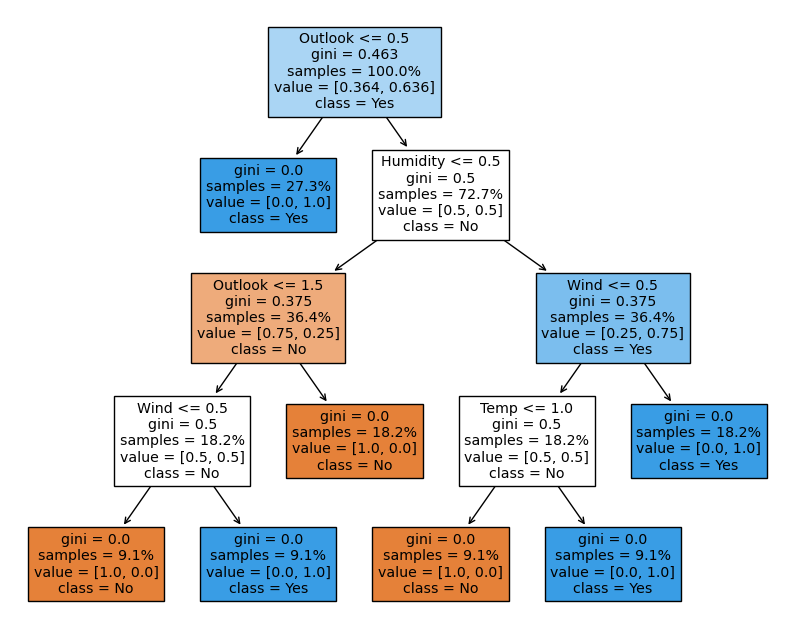

In [11]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(clf, 
                   feature_names=x.columns.to_list(),  
                   class_names=['No', 'Yes'],
                   filled=True,
              proportion=True)

In [12]:
y_pred=clf.predict(x_test)

In [13]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 1.0


In [14]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[1 0]
 [0 2]]


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [16]:
with open("playTennis.txt","w") as f:
    f=tree.export_graphviz(clf,out_file=f)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/Users/amitanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.397\nsamples = 6\nvalue = [3, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 8]')]

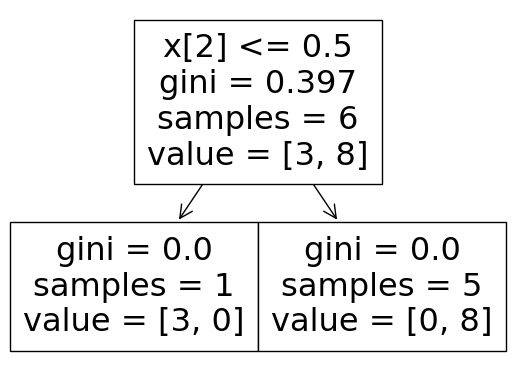

In [19]:
tree.plot_tree(rf.estimators_[0])

In [20]:
y_pred=rf.predict(x_test)

In [21]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 1.0


In [22]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[1 0]
 [0 2]]


In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [24]:
with open("playTennisRF.txt","w") as f:
    f=tree.export_graphviz(rf.estimators_[0],out_file=f)